In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import unidecode
import warnings
warnings.filterwarnings('ignore')
import time
import scorecardpy as sc


from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score


In [598]:
df = pd.read_csv('train.csv')
#df.drop(['id'], axis=1, inplace=True)
print(df.shape)
print(df.label.value_counts())
print(df.label.value_counts()/len(df))

(30000, 64)
0    29514
1      486
Name: label, dtype: int64
0    0.9838
1    0.0162
Name: label, dtype: float64


In [599]:
def VI_to_EN_province(string):
    try:
        string = unidecode.unidecode(string)
        string = string.replace(" ", "").replace("-", "").upper()
        if string == 'TINHDACNONG':
            string = 'TINHDAKNONG'
        elif string == 'THANHPHOHOCHIMINH':
            string = 'TPHOCHIMINH'
        return string
    except:
        return 'NULL'

df['province'] = [np.nan if x== None else VI_to_EN_province(x) for x in df['province']]


In [600]:
df['province'].value_counts()

NULL             12818
TPHOCHIMINH       2389
TINHDONGNAI       1033
TINHBINHDUONG      807
THANHPHOHANOI      667
                 ...  
TINHDIENBIEN        45
TINHBACKAN          38
TINHKONTUM          34
TINHHAGIANG         31
TINHLAICHAU         19
Name: province, Length: 64, dtype: int64

In [601]:
df.columns

Index(['id', 'label', 'province', 'district', 'age_source1', 'age_source2',
       'maCv', 'FIELD_1', 'FIELD_2', 'FIELD_3', 'FIELD_4', 'FIELD_5',
       'FIELD_6', 'FIELD_7', 'FIELD_8', 'FIELD_9', 'FIELD_10', 'FIELD_11',
       'FIELD_12', 'FIELD_13', 'FIELD_14', 'FIELD_15', 'FIELD_16', 'FIELD_17',
       'FIELD_18', 'FIELD_19', 'FIELD_20', 'FIELD_21', 'FIELD_22', 'FIELD_23',
       'FIELD_24', 'FIELD_25', 'FIELD_26', 'FIELD_27', 'FIELD_28', 'FIELD_29',
       'FIELD_30', 'FIELD_31', 'FIELD_32', 'FIELD_33', 'FIELD_34', 'FIELD_35',
       'FIELD_36', 'FIELD_37', 'FIELD_38', 'FIELD_39', 'FIELD_40', 'FIELD_41',
       'FIELD_42', 'FIELD_43', 'FIELD_44', 'FIELD_45', 'FIELD_46', 'FIELD_47',
       'FIELD_48', 'FIELD_49', 'FIELD_50', 'FIELD_51', 'FIELD_52', 'FIELD_53',
       'FIELD_54', 'FIELD_55', 'FIELD_56', 'FIELD_57'],
      dtype='object')

<h2>Data imbalance to much </h2><br>
After after descriptive statistics , we should resample data

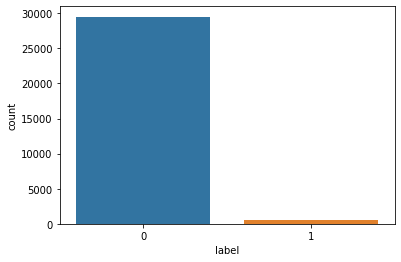

In [602]:
sns.countplot(x='label', data=df)

In [603]:
sort_cols = []
for col in df.columns:
    if len(df[col].unique()) <=4:
        sort_cols.append(col)
print(sort_cols)

['label', 'FIELD_1', 'FIELD_2', 'FIELD_8', 'FIELD_10', 'FIELD_14', 'FIELD_15', 'FIELD_18', 'FIELD_19', 'FIELD_20', 'FIELD_21', 'FIELD_23', 'FIELD_25', 'FIELD_26', 'FIELD_27', 'FIELD_28', 'FIELD_29', 'FIELD_30', 'FIELD_31', 'FIELD_32', 'FIELD_33', 'FIELD_34', 'FIELD_36', 'FIELD_38', 'FIELD_42', 'FIELD_44', 'FIELD_46', 'FIELD_47', 'FIELD_48', 'FIELD_49']


In [604]:
df[sort_cols].head()

,label,FIELD_1,FIELD_2,FIELD_8,FIELD_10,FIELD_14,FIELD_15,FIELD_18,FIELD_19,FIELD_20,...,FIELD_33,FIELD_34,FIELD_36,FIELD_38,FIELD_42,FIELD_44,FIELD_46,FIELD_47,FIELD_48,FIELD_49
0,0,1,1.0,NaN,NaN,1,1,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,0,True,True,True
1,0,1,0.0,MALE,T1,0,0,True,True,True,...,1,0,FALSE,False,Zezo,One,0,False,False,True
2,0,0,1.0,FEMALE,T1,0,0,False,False,False,...,1,1,FALSE,False,Zezo,Two,1,True,True,True
3,0,0,1.0,NaN,NaN,1,1,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,0,False,True,False
4,0,0,1.0,MALE,T1,0,0,True,True,True,...,1,0,FALSE,False,Zezo,One,1,True,True,True


# BOOL clearn

In [605]:
# Get bool columns
clearned_bools = []
bool_cols = []
for col in df.columns.difference(['label']):
    if len(df[col].unique()) <=3:
        if 1 in df[col].unique():
            if  df[col].isnull().sum() == 0:
                clearned_bools.append(col)
            else:
                bool_cols.append(col)
print(clearned_bools)
print(bool_cols)

['FIELD_1', 'FIELD_14', 'FIELD_15', 'FIELD_32', 'FIELD_33', 'FIELD_34', 'FIELD_46', 'FIELD_47', 'FIELD_48', 'FIELD_49']
['FIELD_18', 'FIELD_19', 'FIELD_2', 'FIELD_20', 'FIELD_23', 'FIELD_25', 'FIELD_26', 'FIELD_27', 'FIELD_28', 'FIELD_38']


In [606]:
df[clearned_bools].head(3)

,FIELD_1,FIELD_14,FIELD_15,FIELD_32,FIELD_33,FIELD_34,FIELD_46,FIELD_47,FIELD_48,FIELD_49
0,1,1,1,1,1,1,0,True,True,True
1,1,0,0,0,1,0,0,False,False,True
2,0,0,0,0,1,1,1,True,True,True


In [607]:
df[bool_cols].head(3)

,FIELD_18,FIELD_19,FIELD_2,FIELD_20,FIELD_23,FIELD_25,FIELD_26,FIELD_27,FIELD_28,FIELD_38
0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,True,0.0,True,True,False,False,True,True,False
2,False,False,1.0,False,True,True,True,True,True,False


<b>Notify</b>
almost field in bool_cols are na <b>9678</b> , and <b>463</b> rows <br>
This may be an important detail that needs to be explored deeply

In [608]:
df[bool_cols].isnull().sum()

FIELD_18    9678
FIELD_19    9678
FIELD_2      463
FIELD_20    9678
FIELD_23    9678
FIELD_25    9678
FIELD_26    9678
FIELD_27    9678
FIELD_28    9678
FIELD_38    9678
dtype: int64

In [609]:
# clearn boolcols 
for col in bool_cols:
    df[col] = df[col].map({True: 1, False:0})
    df[col].fillna(2,inplace=True)

In [610]:
df[bool_cols].head(3)

,FIELD_18,FIELD_19,FIELD_2,FIELD_20,FIELD_23,FIELD_25,FIELD_26,FIELD_27,FIELD_28,FIELD_38
0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


for col in clearned_bools:
    plt.figure()
    sns.countplot(x=col, data=df,hue='label')

for col in bool_cols:
    plt.figure()
    sns.countplot(x=col, data=df,hue='label')

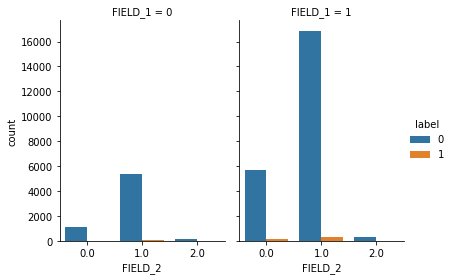

In [611]:
sns.catplot(x="FIELD_2", hue="label", col="FIELD_1",
                data=df, kind="count",
                height=4, aspect=.7)

# Float clearn

In [612]:
print(df[df.FIELD_16.isnull()].label.value_counts())
print(df[df.FIELD_16.isnull()].label.value_counts()/len(df[df.FIELD_16.isnull()]))

0    9476
1     202
Name: label, dtype: int64
0    0.979128
1    0.020872
Name: label, dtype: float64


In [613]:
float_cols = list(df._get_numeric_data().columns)
#df[float_cols].hist(figsize=(16,16))
#plt.show()

In [614]:
# Get bool columns
clearned_floats = []
float_cols = []
for col in df._get_numeric_data().columns.difference(['label']):
    if len(df[col].unique()) >3:
        if  df[col].isnull().sum() == 0:
            clearned_floats.append(col)
        else:
            float_cols.append(col)
print('clearn cols :',clearned_floats)
print('na cols : ',float_cols)

for col in float_cols:
    #print(df[col].value_counts())
    print(df[col].isnull().sum())


clearn cols : ['id']
na cols :  ['FIELD_16', 'FIELD_21', 'FIELD_22', 'FIELD_3', 'FIELD_4', 'FIELD_5', 'FIELD_50', 'FIELD_51', 'FIELD_52', 'FIELD_53', 'FIELD_54', 'FIELD_55', 'FIELD_56', 'FIELD_57', 'FIELD_6', 'age_source1', 'age_source2']
9678
9678
9678
463
463
463
9678
9678
9678
9678
9678
9678
9678
9678
463
12811
9678


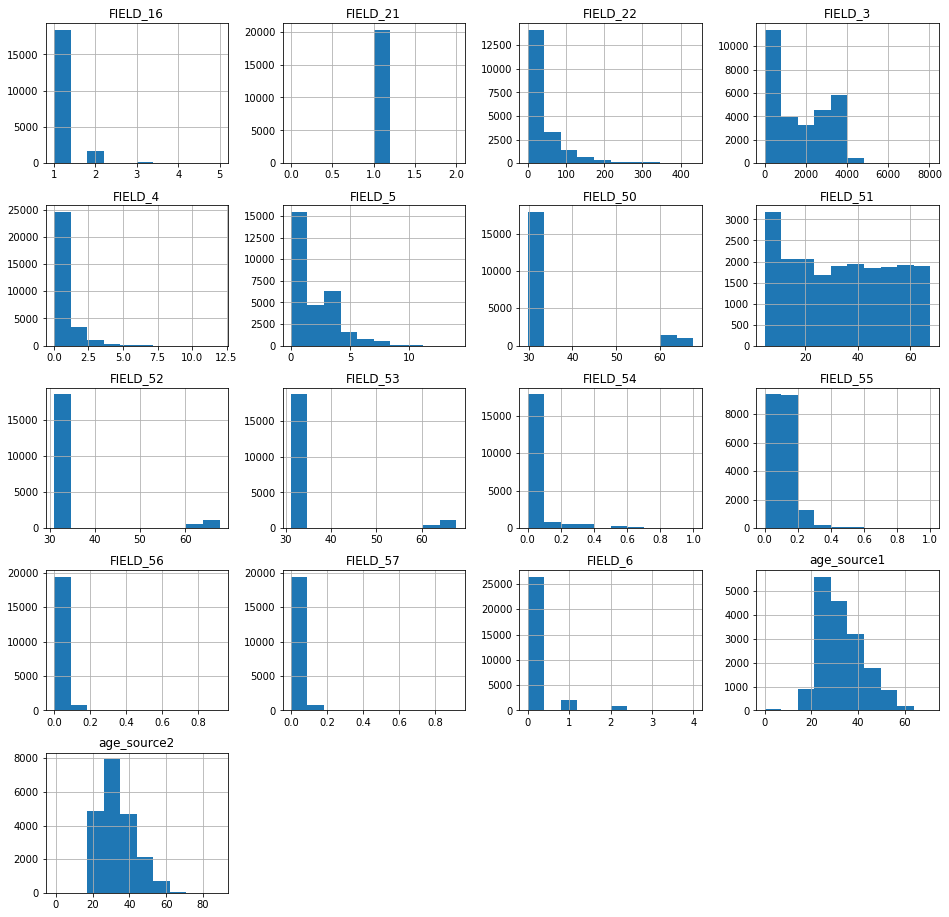

In [615]:
df[float_cols].hist(figsize=(16,16))
plt.show()

In [616]:
df[float_cols].head(3)

,FIELD_16,FIELD_21,FIELD_22,FIELD_3,FIELD_4,FIELD_5,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57,FIELD_6,age_source1,age_source2
0,NaN,NaN,NaN,2547.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2.0,1.0,4.0,-1.0,1.0,1.0,29.77,17.561,30.955,31.171,0.0,0.04,0.0,0.0,1.0,44.0,44.0
2,1.0,1.0,54.0,3273.0,1.0,4.0,29.77,56.512,30.955,31.171,0.0,0.16,0.0,0.0,0.0,30.0,30.0


# Object  clearn

In [617]:
# Object cols
other_cols = df.columns.difference(clearned_bools + bool_cols + float_cols)

In [618]:
other_cols

Index(['FIELD_10', 'FIELD_11', 'FIELD_12', 'FIELD_13', 'FIELD_17', 'FIELD_24',
       'FIELD_29', 'FIELD_30', 'FIELD_31', 'FIELD_35', 'FIELD_36', 'FIELD_37',
       'FIELD_39', 'FIELD_40', 'FIELD_41', 'FIELD_42', 'FIELD_43', 'FIELD_44',
       'FIELD_45', 'FIELD_7', 'FIELD_8', 'FIELD_9', 'district', 'id', 'label',
       'maCv', 'province'],
      dtype='object')

<b> Some special columns : </b>
<ul>
    <li>FIELD_8 : GENDER  {'MALE':1,'FEMALE':0}</li>
    <li>FIELD_45 : bool {'1':1,'1.0':1, '2':0,'2.0':0,'None':2} </li>
    <li>FIELD_29 : bool </li>
    <li>FIELD_30 : bool </li>
    <li>FIELD_31 : bool </li>
    <li>FIELD_36 : bool </li>
    <li>FIELD_37 : bool </li>
    <li>FIELD_35 : number in str type ('One', 'Two',...)  <b> 9678</b> na </li>
</ul>

In [619]:
bool_objs = ['FIELD_36','FIELD_31','FIELD_30','FIELD_29','FIELD_37']
for col in bool_objs:
    df[col]= df[col].map({'FALSE':0,'False':0,'TRUE':1,'True':1,'None':2})
    df[col].fillna(2,inplace=True)
    print(df[col].value_counts())

0.0    15932
2.0     9683
1.0     4385
Name: FIELD_36, dtype: int64
0.0    16083
2.0    13917
Name: FIELD_31, dtype: int64
2.0    13803
0.0    10499
1.0     5698
Name: FIELD_30, dtype: int64
0.0    16717
2.0    13282
1.0        1
Name: FIELD_29, dtype: int64
2.0    20818
1.0     8624
0.0      558
Name: FIELD_37, dtype: int64


In [620]:
# FIELD_8
df.FIELD_8 = df.FIELD_8.map({'MALE':1,'FEMALE':0})
df.FIELD_8.fillna(2,inplace=True)

In [621]:
df.FIELD_45 = df.FIELD_45.map({'1':1,'1.0':1,'2':0,'2':0,'None':2})
df.FIELD_45.fillna(2,inplace=True)
df.FIELD_45.value_counts()

2.0    13403
1.0    12962
0.0     3635
Name: FIELD_45, dtype: int64

In [622]:
df.FIELD_35 = df.FIELD_35.map({'Zero':0,'One':1,'Two':2,'Three':3,'Four':4})
#df.FIELD_35.fillna(5,inplace=True)
df.FIELD_35.value_counts()

0.0    9210
1.0    4472
4.0    4056
2.0    1366
3.0    1218
Name: FIELD_35, dtype: int64

In [623]:
df.FIELD_41 = df.FIELD_41.map({'I':1,'II':2,'III':3,'IV':5,'V':5})
df.FIELD_41.fillna(0,inplace=True)
df.FIELD_41.value_counts()

1.0    12936
0.0     9678
5.0     5503
2.0     1146
3.0      737
Name: FIELD_41, dtype: int64

In [624]:
df.FIELD_42 = df.FIELD_42.map({'Zezo':0,'One':1,'None':2})
df.FIELD_42.fillna(2,inplace=True)
df.FIELD_42.value_counts()

0.0    20163
2.0     9680
1.0      157
Name: FIELD_42, dtype: int64

In [625]:
df.FIELD_44 = df.FIELD_44.map({'One':1,'Two':0,'None':2})
df.FIELD_44.fillna(2,inplace=True)
df.FIELD_44.value_counts()

1.0    14850
2.0     9713
0.0     5437
Name: FIELD_44, dtype: int64

### FIELD 7

In [626]:
from scipy import stats

x1 = ['TC','NO','CC','NN','TK','HX','TQ','XK','HD','HC','CH','SV','GB','XD']
x2 = ['DN', 'GD', 'DT', 'CK', 'TE']
x3 = ['CB', 'DK', 'HS', 'CN']
x4 = ['BT', '', 'TN', 'TA', 'HT', 'none', 'HN', 'TS', 'KC']

def field7(x):
    try:
        x = x.replace("[","").replace("]","").replace("'","")
        x = x.split(',')
        return stats.mode(x).mode[0].replace(" ","")
    except:
        return 'none'
    
df.FIELD_7 = [field7(x) for x in df.FIELD_7]

df.loc[df.FIELD_7.isin(x1 ), 'FIELD_7'] = 'group1'
df.loc[df.FIELD_7.isin(x2 ), 'FIELD_7'] = 'group2'
df.loc[df.FIELD_7.isin(x3 ), 'FIELD_7'] = 'group3'
df.loc[df.FIELD_7.isin(x4 ), 'FIELD_7'] = 'group4'

In [627]:
#df.FIELD_11.isnull().sum()
df.FIELD_11.value_counts()

12      8499
0       5525
6       2110
3       1578
24       350
4        333
9        237
5        230
8        218
7        204
10       170
2        165
36       150
13       143
1        139
11       132
None      34
15        20
60        18
14        12
20         5
25         5
17         5
54         4
18         4
26         4
16         3
22         3
19         2
21         2
34         2
35         2
28         2
69         1
59         1
56         1
45         1
37         1
72         1
47         1
32         1
70         1
42         1
30         1
27         1
Name: FIELD_11, dtype: int64

In [628]:
df.FIELD_11.isnull().sum()
#df.FIELD_9.value_counts() 
#sns.countplot(x='FIELD_9', data=df,hue='label')

9678

In [629]:
df.groupby(['FIELD_11','label']).agg(len)

id  province  district  age_source1  age_source2  maCv  \
FIELD_11 label                                                             
0        0      5445      5445      5445       5445.0       5445.0  5445   
         1        80        80        80         80.0         80.0    80   
1        0       137       137       137        137.0        137.0   137   
         1         2         2         2          2.0          2.0     2   
10       0       169       169       169        169.0        169.0   169   
...              ...       ...       ...          ...          ...   ...   
8        1         4         4         4          4.0          4.0     4   
9        0       233       233       233        233.0        233.0   233   
         1         4         4         4          4.0          4.0     4   
None     0        32        32        32         32.0         32.0    32   
         1         2         2         2          2.0          2.0     2   

                FIELD_1  FIELD_2  FIELD_3  FIELD_4  ...  FIELD_48  FIELD_49  \
FIELD_11 label                                      ...                       
0        0         5445   5445.0   5445.0   5445.0  ...      5445      5445   
         1           80     80.0     80.0     80.0  ...        80        80   
1        0          137    137.0    137.0    137.0  ...       137       137   
         1            2      2.0      2.0      2.0  ...         2         2   
10       0          169    169.0    169.0    169.0  ...       169       169   
...                 ...      ...      ...      ...  ...       ...       ...   
8        1            4      4.0      4.0      4.0  ...         4         4   
9        0          233    233.0    233.0    233.0  ...       233       233   
         1            4      4.0      4.0      4.0  ...         4         4   
None     0           32     32.0     32.0     32.0  ...        32        32   
         1            2      2.0      2.0      2.0  ...         2         2   

                FIELD_50  FIELD_51  FIELD_52  FIELD_53  FIELD_54  FIELD_55  \
FIELD_11 label                                                               
0        0        5445.0    5445.0    5445.0    5445.0    5445.0    5445.0   
         1          80.0      80.0      80.0      80.0      80.0      80.0   
1        0         137.0     137.0     137.0     137.0     137.0     137.0   
         1           2.0       2.0       2.0       2.0       2.0       2.0   
10       0         169.0     169.0     169.0     169.0     169.0     169.0   
...                  ...       ...       ...       ...       ...       ...   
8        1           4.0       4.0       4.0       4.0       4.0       4.0   
9        0         233.0     233.0     233.0     233.0     233.0     233.0   
         1           4.0       4.0       4.0       4.0       4.0       4.0   
None     0          32.0      32.0      32.0      32.0      32.0      32.0   
         1           2.0       2.0       2.0       2.0       2.0       2.0   

                FIELD_56  FIELD_57  
FIELD_11 label                      
0        0        5445.0    5445.0  
         1          80.0      80.0  
1        0         137.0     137.0  
         1           2.0       2.0  
10       0         169.0     169.0  
...                  ...       ...  
8        1           4.0       4.0  
9        0         233.0     233.0  
         1           4.0       4.0  
None     0          32.0      32.0  
         1           2.0       2.0  

[62 rows x 62 columns]

print(df.FIELD_11.dtypes)
df.FIELD_11 = df.FIELD_11.map({'None':np.nan}).astype(float)
print(df.FIELD_11.dtypes)

In [630]:
def VI_to_EN2(string):
    try:
        string = unidecode.unidecode(string)
        string = string.replace(" ", "").replace("-", "").lower()
    except:
        return  'none'
    
    value_list = ['congnhan','nhanvien','giaovien' ,'ketoan']
    
    if string == 'none':
        return string
    elif string in ('taixe','laixe'):
        return 'taixe'
    
    for s in value_list:
        if s in string:
            return  s
            
            
    return 'other'

df['maCv'] = [np.nan if x== None else VI_to_EN2(x) for x in df['maCv']]


In [631]:
clearned_objs = ['FIELD_36','FIELD_31','FIELD_30','FIELD_29','FIELD_8','FIELD_45','FIELD_35','FIELD_41','FIELD_42','FIELD_44','FIELD_7']

In [632]:
#list(other_cols) 
df[df[other_cols].columns.difference(clearned_objs)].head()

#df.drop(['distric','id'])

,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_17,FIELD_24,FIELD_37,FIELD_39,FIELD_40,FIELD_43,FIELD_9,district,id,label,maCv,province
0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,na,NaN,0,0,none,NULL
1,T1,12,None,BI,G8,None,2.0,VN,None,None,GD,Thành phố Biên Hòa,1,0,none,TINHDONGNAI
2,T1,12,0,YN,None,None,2.0,None,None,None,DN,Huyện Long Thành,2,0,congnhan,TINHDONGNAI
3,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,na,Thành phố Tuyên Quang,3,0,none,TINHTUYENQUANG
4,T1,12,None,BI,G8,None,2.0,None,None,None,GD,Quận 1,4,0,none,TPHOCHIMINH


clearned:
    'FIELD_1',
    'FIELD_14',
    'FIELD_15',
    'FIELD_32',
    'FIELD_33',
    'FIELD_34',
    'FIELD_46',
    'FIELD_47',
    'FIELD_48',
    'FIELD_49'


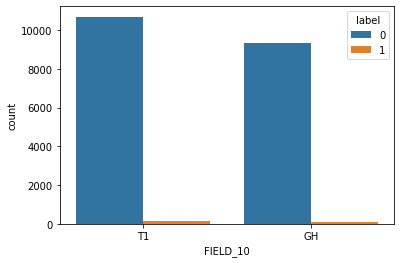

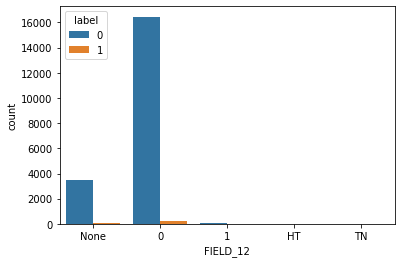

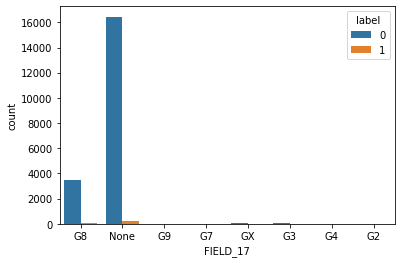

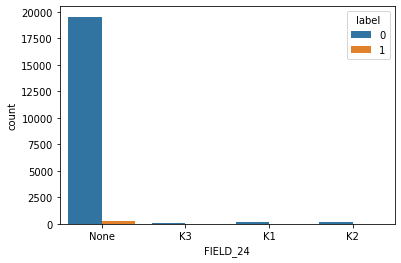

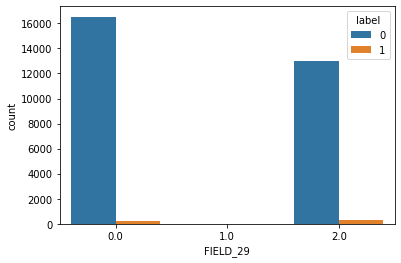

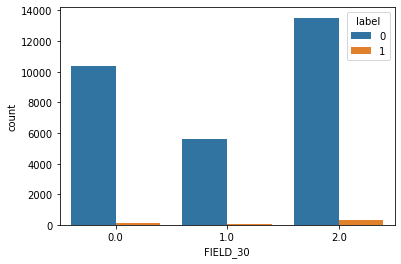

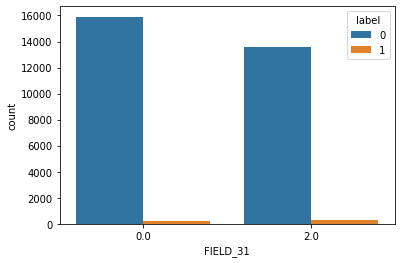

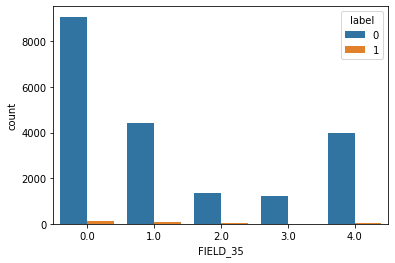

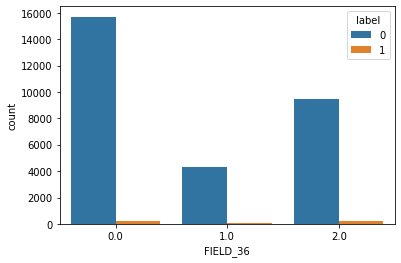

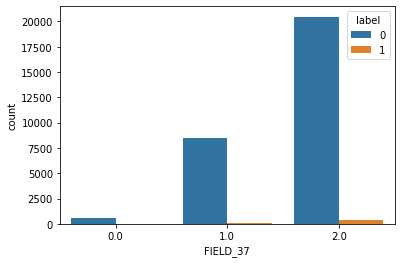

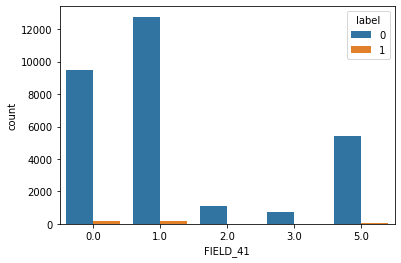

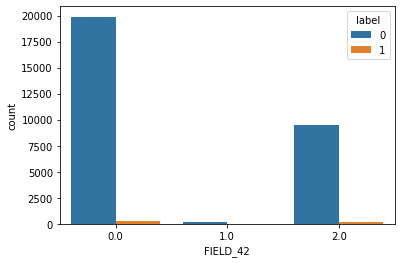

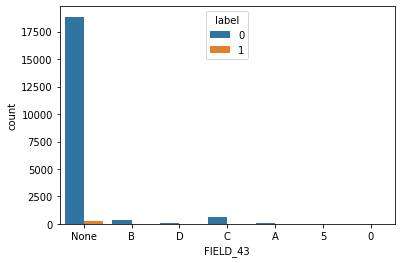

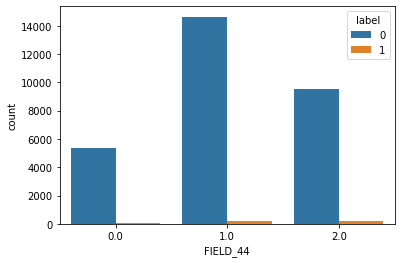

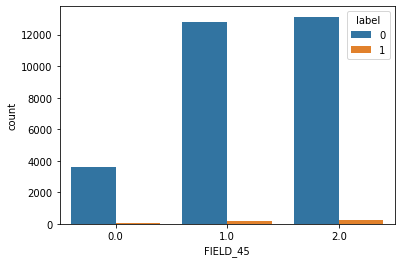

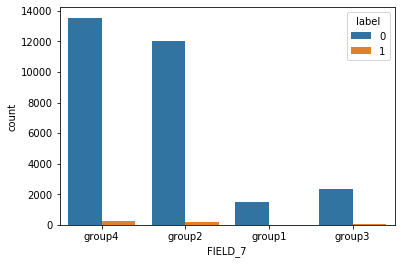

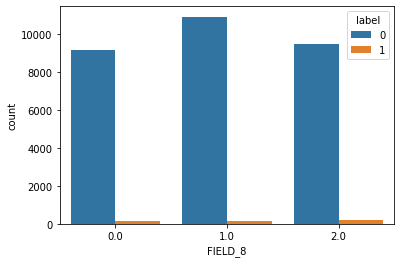

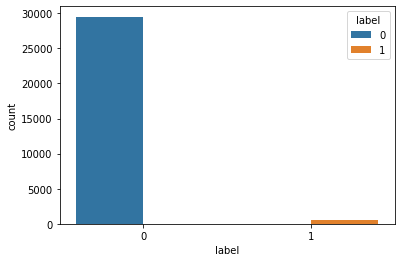

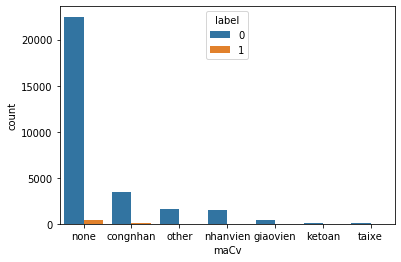

In [633]:
for col in other_cols:
    if len(df[col].unique()) < 10:
        plt.figure()
        sns.countplot(x=col, data=df,hue='label')

In [634]:
#df.dropna().label.value_counts()
#df.dropna().label.value_counts()/len(df.dropna())